In [2]:
#import required packages
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import cv2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


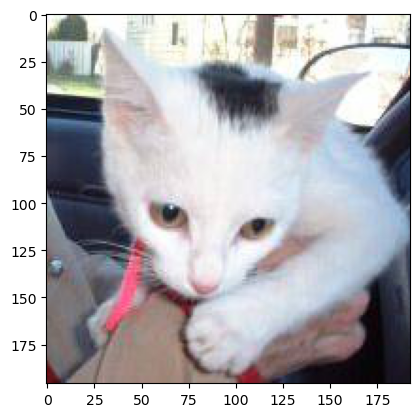

In [9]:
%pylab inline
import matplotlib.image as mpimg
img=mpimg.imread(r'C:\Users\KUTTAMANI\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\cats\cat.2004.jpg')
imgplot=plt.imshow(img)
plt.show()

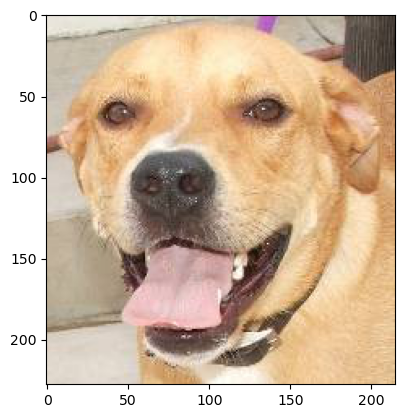

In [10]:
img=mpimg.imread(r'C:\Users\KUTTAMANI\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\dogs\dog.2001.jpg')
imgplot=plt.imshow(img)
plt.show()

In [14]:
# #import keras modules
                
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image

In [15]:
img_height=150
img_width=150
train_data_dir=r'C:\Users\KUTTAMANI\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\train'
test_data_dir=r'C:\Users\KUTTAMANI\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\validation'
nb_train_sample=100
nb_test_sample=100
epochs=20
batch_size=20

In [16]:
import tensorflow.keras.backend as kb

if kb.image_data_format()=='channel_first':
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

print(input_shape)

(150, 150, 3)


In [17]:
#train model generating

train_data_gen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_data_gen=ImageDataGenerator(rescale=1/255)

train_generator=train_data_gen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])

test_generator=test_data_gen.flow_from_directory(test_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')
                                                 
print(train_generator)                                

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


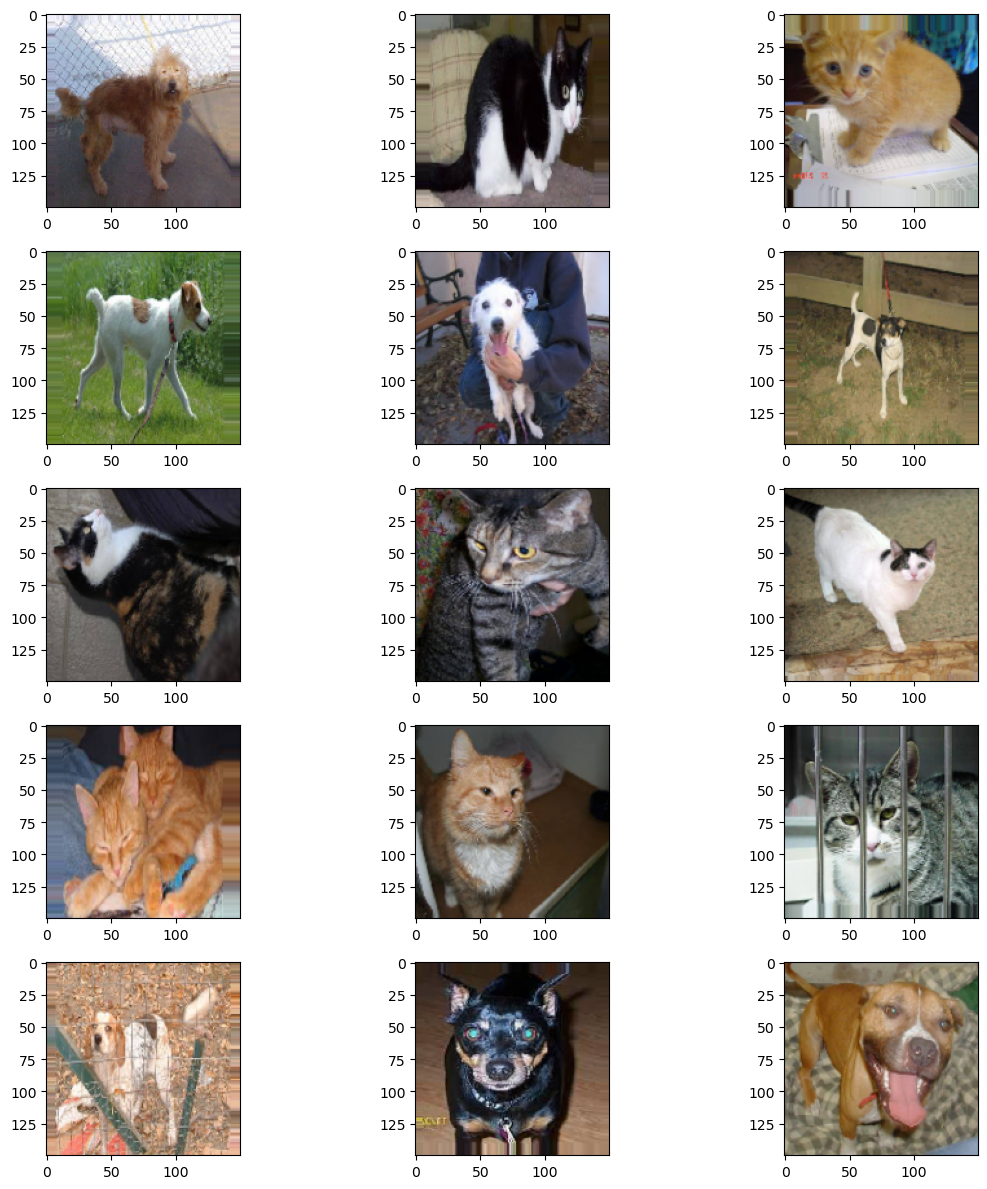

In [18]:
#visualization of image generator
plt.figure(figsize=(12,12))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    for x_batch,y_batch in train_generator:
        image=x_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [19]:
from keras.models import Sequential

In [20]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from keras.preprocessing import image

In [21]:
#model generator

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #create conventianal neaural network
model.add(Activation('relu')) #remove -ve pixel from the images

model.add(MaxPooling2D(pool_size=(2,2))) #reducing size of data
model.add(Flatten()) #convert multi diamonsinal array to 1D array
model.add(Dense(64))#64 neurons with 3*3 filter
model.add(Activation('relu'))

model.add(Dense(1)) #o/p lyer
model.add(Activation('sigmoid'))

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [22]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [23]:
#fit my model

training=model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_sample,
                              epochs=epochs,
                              validation_data=test_generator,
                              validation_steps=nb_test_sample)


C:\Users\KUTTAMANI\AppData\Local\Temp\ipykernel_8552\897699050.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training=model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 87s 843ms/step - loss: 3.3968 - accuracy: 0.5045 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 72s 724ms/step - loss: 0.7224 - accuracy: 0.4990
Epoch 3/20
100/100 [==============================] - 87s 874ms/step - loss: 0.7066 - accuracy: 0.4975
Epoch 4/20
100/100 [==============================] - 77s 765ms/step - loss: 0.6941 - accuracy: 0.5005
Epoch 5/20
100/100 [==============================] - 73s 731ms/step - loss: 0.6964 - accuracy: 0.4935
Epoch 6/20
100/100 [==============================] - 77s 766ms/step - loss: 0.6939 - accuracy: 0.4995
Epoch 7/20
100/100 [==============================] - 81s 814ms/step - loss: 0.6901 - accuracy: 0.5220
Epoch 8/20
100/100 [==============================] - 77s 766ms/step - loss: 0.6790 - accuracy: 0.5825
Epoch 9/20
100/100 [==============================] - 80s 801ms/step - loss: 0.6469 - accuracy: 0.6125
Epoch 10/20
100/100 [==========

1/1 [==============================] - 0s 59ms/step
cat


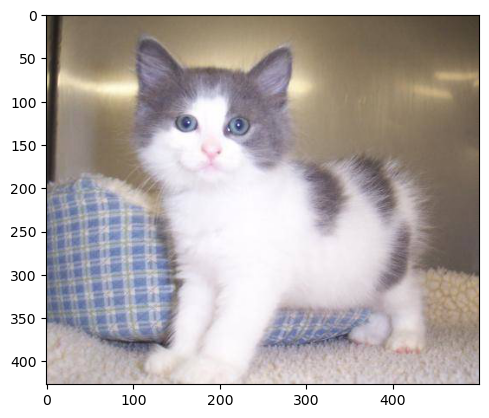

In [52]:
import keras.utils as image

img_pred=image.load_img(r'C:\Users\KUTTAMANI\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\cats\cat.2043.jpg',target_size=(150,150))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)


ans=model.predict(img_pred)
if ans[0][0]>=0.7:
    print("dog")
else:
    print('cat')
    
img=mpimg.imread(r'C:\Users\KUTTAMANI\Downloads\cats_and_dogs_filtered\cats_and_dogs_filtered\validation\cats\cat.2043.jpg')
implot=plt.imshow(img)
plt.show()